<a href="https://colab.research.google.com/github/2022yingjie/Machine_Learning-xitutu/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.概念

> 1.1 支持向量机(SVM)是一种经典二分类机器学习算法， 其找到的分割超平面具有良好的鲁棒性。如果用x表示数据点，用y表示类别（y可以取1或者-1，分别代表两个不同的类），一个线性分类器的学习目标便是要在n维的数据空间中找到一个超平面（hyper plane），这个超平面的方程可以表示为：$$W^{T}X+b=0$$


> 1.2 在超平面$w^{T}x+b=0$确定的情况下，$||w^{T}x+b||$能够表示点$x$到距离超平面的远近，而通过观察$w^{T}x+b$的符号与类标记$y$的符号是否一致可判断分类是否正确，所以，可以用$(y(w*x+b))$的正负性来判定或表示分类的正确性。于此，我们便引出了函数间隔（functional margin）的概念。$$d=\frac{||w^{T}x+b||}{||w||}=\frac{(y(w*x+b))}{||w||}$$

>1.3 对一个数据点进行分类，当超平面离数据点的“间隔”越大，分类的确信度（confidence）也越大。所以，为了使得分类的确信度尽量高，需要让所选择的超平面能够最大化这个“间隔”值。


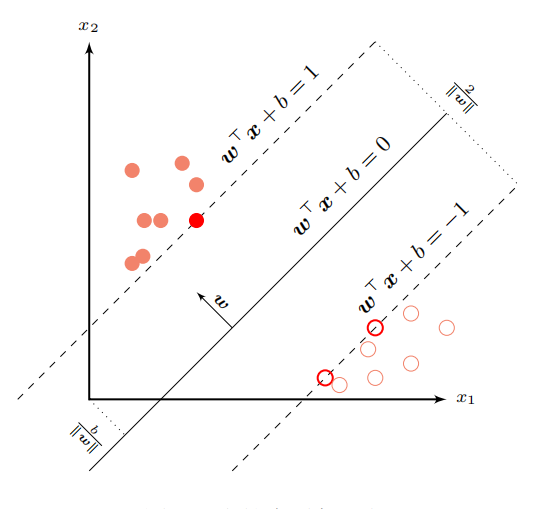
>1.4 如图，中间实线为分割超平面，虚线上的点叫支持向量，这些点满足$$(y(w*x+b))=1$$


> 1.5 一般用拉格朗日函数进行优化，SVM是一个凸函数，可以通过最大化对偶函数来求解。 可以使用核函数(Kernal Function)隐式地将样本从原始空间投影到更高纬度空间，解决在原始空间线性不可分的问题。如果不是线性可分的，也可以用软间隔，给目标函数加入松弛变量来近似求解。

# 2.关于SVM的一些问题。

> 2.1 训练误差为0的SVM一定存在吗？答：一定存在。

> 2.2 带核的SVM为什么能分类非线性问题？答：核函数的本质是两个函数的內积，通过核函数将其隐射到高维空间，在高维空间非线性问题转化为线性问题, SVM得到超平面是高维空间的线性分类平面。其分类结果也视为低维空间的非线性分类结果, 因而带核的SVM就能分类非线性问题。

> 2.3 如何选择核函数？答：
* 如果特征的数量大到和样本数量差不多，则选用LR或者线性核的SVM；
* 如果特征的数量小，样本的数量正常，则选用SVM+高斯核函数；
* 如果特征的数量小，而样本的数量很大，则需要手工添加一些特征从而变成第一种情况。

> 2.4 SVM如何处理多分类问题？答：一对多：对每个类都训练出一个分类器，由svm是二分类，所以将此而分类器的两类设定为
*   目标类为一类，其余类为另外一类。这样针对k个类可以训练出k个分类器，当有一个新的样本来的时候，用这k个分类器来测试，那个分类器的概率高，那么这个样本就属于哪一类。这种方法效果不太好，bias比较高。
*   一对一：针对任意两个类训练出一个分类器，如果有k类，一共训练出C(2,k)个分类器，这样当有一个新的样本要来的时候，用这C(2,k) 个分类器来测试，每当被判定属于某一类的时候，该类就加一，最后票数最多的类别被认定为该样本的类。


> 2.5 SVM为什么采用间隔最大化？答：最大化间隔找最优分割平面获得唯一解。

> 2.6 为什么要将求解SVM的原始问题转换为其对偶问题？答：对偶问题往往更易求解（当我们寻找约束存在时的最优点的时候，约束的存在虽然减小了需要搜寻的范围，但是却使问题变得更加复杂。为了使问题变得易于处理，我们的方法是把目标函数和约束全部融入一个新的函数，即拉格朗日函数，再通过这个函数来寻找最优点。）

# 3.LR与SVM的联系与区别。
> 3.1 相同点。
*  都是线性分类器。本质上都是求一个最佳分类超平面。
*  都是监督学习算法。
*  都是判别模型。判别模型不关心数据是怎么生成的，它只关心信号之间的差别，然后用差别来简单对给定的一个信号进行分类。

> 3.2 不同点。
*  LR是参数模型，svm是非参数模型。
*  损失函数不一样，LR是交叉熵损失，SVM是hinge损失。不同的loss function代表了不同的假设前提，也就代表了不同的分类原理。简单来说，​逻辑回归方法基于概率理论，假设样本为1的概率可以用sigmoid函数来表示，然后通过极大似然估计的方法估计出参数的值。支持向量机​基于几何间隔最大化原理，认为存在最大几何间隔的分类面为最优分类面。
*  SVM的处理方法是只考虑support vectors，也就是和分类最相关的少数点，去学习分类器。所以影响SVM决策面的样本点只有少数的结构支持向量，当在支持向量外添加或减少任何样本点对分类决策面没有任何影响；而在LR中，每个样本点都会影响决策面的结果。
*  逻辑回归相对来说模型更简单，好理解，特别是大规模线性分类时比较方便。而SVM的理解和优化相对来说复杂一些，SVM转化为对偶问题后,分类只需要计算与少数几个支持向量的距离,这个在进行复杂核函数计算时优势很明显,能够大大简化模型和计算。
*  logic 能做的 svm能做，但可能在准确率上有问题，svm能做的logic有的做不了。
*  在解决非线性问题时，支持向量机采用核函数的机制，而LR通常不采用核函数的方法。因为，SVM算法里只有少数几个代表支持向量的样本参与了计算，也就是只有少数几个样本需要参与核计算（即kernal machine解的系数是稀疏的）。然而，LR算法里，每个样本点都必须参与决策面的计算过程，也就是说，假设我们在LR里也运用核函数的原理，那么每个样本点都必须参与核计算，这带来的计算复杂度是相当高的。所以，在具体应用时，LR很少运用核函数机制。​

# 4.线性分类器和非线性分类器。
> 4.1 线性分类器。
*  线性分类器可解释性好，计算复杂度较低，不足之处是模型的拟合效果相对弱些。（LR,单层感知机，贝叶斯分类器，线性回归）
*  非线性分类器效果拟合能力较强，不足之处是数据量不足容易过拟合、计算复杂度高、可解释性不好。（决策树、RF、GBDT、多层感知机）
*  SVM两种都有（看线性核还是高斯核）

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

print('Class labels:', np.unique(y))




Class labels: [0 1 2]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler # standarize input data

sc = StandardScaler()
sc.fit(X_train)
sc.fit(X_test)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<ipython-input-13-5e6fcb1610f5>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],
<ipython-input-13-5e6fcb1610f5>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


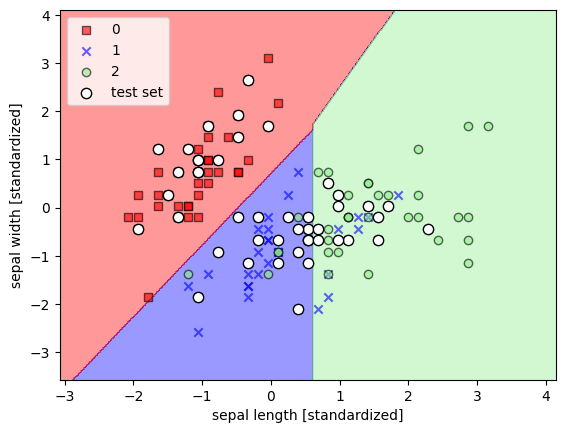

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='white',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')




svm = SVC(C=1.0, kernel='linear', random_state=0)

svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.show()

<ipython-input-13-5e6fcb1610f5>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],
<ipython-input-13-5e6fcb1610f5>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


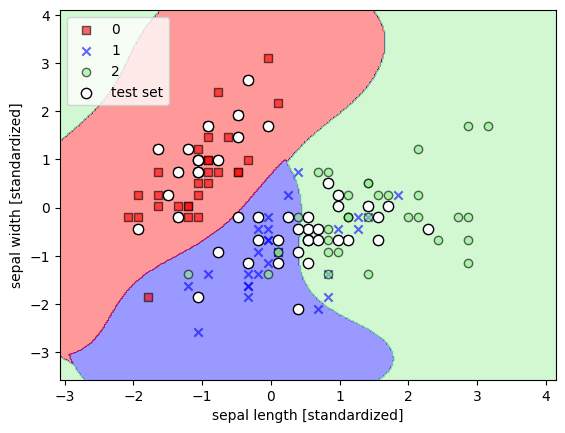

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=0.5, random_state=0, C=1.0)

svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.show()